In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [5]:
X_train_data = pd.read_csv('loan_data/preprocessed_train_data.csv', index_col=0)
X_test_data = pd.read_csv('loan_data/preprocessed_test_data.csv', index_col=0)
y_train_data = pd.read_csv('loan_data/preprocessed_y_train_data.csv', index_col=0)
y_test_data = pd.read_csv('loan_data/preprocessed_y_test_data.csv', index_col=0)

In [6]:
X_train_data.head(2)

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,purpose:sm_b_educ,purpose:ren_en_mov_house_other,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mnths_since_issue_date_factor,mnths_since_issue_date:<38,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,annual_inc_factor,annual_inc:<20k,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,mths_since_last_delinq_factor,mths_since_last_delinq:<15,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,mths_since_e

In [7]:
X_train_data.shape, X_test_data.shape, y_train_data.shape, y_test_data.shape

((373028, 270), (93257, 270), (373028, 1), (93257, 1))

### Selecting the Features

In [20]:
X_train_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'acc_now_delinq',
       'total_rev_hi_lim', 'emp_length_int', 'term_int',
       'earliest_cr_line_mnths', 'mnths_since_issue_date', 'grade:A',
       'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3', 'sub_grade:A4',
       'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2', 'sub_grade:B3',
       'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1', 'sub_grade:C2',
       'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5', 'sub_grade:D1',
       'sub_grade:D2', 'sub_grade:D3', 'sub_g

In [21]:
#### For our model we'll use:
X_train_with_ref_cat = X_train_data.loc[:, [
 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
 'home_ownership:OWN', 'home_ownership:MORTGAGE', 'home_ownership:RENT_OTHER_NONE',
 'addr_state:NY', 'addr_state:NH_WV_WY_DC_ME', 'addr_state:MD_OK', 'addr_state:NM_AR_NC_VA_NJ_LA', 'addr_state:CA',
 'addr_state:MO_RI_DE_AZ_TN_ID_MI', 'addr_state:OH_MA_KY_UT_PA', 'addr_state:MN_SD_IN_GA_WA', 'addr_state:OR_WI',
 'addr_state:IL_MS_CO', 'addr_state:VT_CT_KS_MT_SC_AK', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Source Verified', 'verification_status:Not Verified', 'verification_status:Verified',
 'purpose:ren_en_mov_house_other', 'purpose:debt_consolidation', 'purpose:med_vac_wedd', 'purpose:home_imp_maj_pur_car',
 'purpose:sm_b_educ',
 'initial_list_status:w', 'initial_list_status:f',
 'emp_length_int:1', 'emp_length_int:2-4', 'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10', 'emp_length_int:0',
 'mnths_since_issue_date:38-39', 'mnths_since_issue_date:40-41', 'mnths_since_issue_date:42-48', 'mnths_since_issue_date:49-52',
 'mnths_since_issue_date:53-64', 'mnths_since_issue_date:65-84', 'mnths_since_issue_date:>84', 'mnths_since_issue_date:<38',
 'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 'int_rate:>20.281', 'int_rate:<9.548',
 'annual_inc:20k-30k', 'annual_inc:30k-40k', 'annual_inc:40k-50k', 'annual_inc:50k-60k', 'annual_inc:60k-70k',
 'annual_inc:70k-80k', 'annual_inc:80k-90k', 'annual_inc:90k-100k', 'annual_inc:100k-120k', 'annual_inc:120k-150k',
 'annual_inc:>150k', 'annual_inc:<20k',
 'mths_since_last_delinq:15-37','mths_since_last_delinq:37-63', 'mths_since_last_delinq:>=63', 'mths_since_last_delinq:<15',
 'mths_since_earliest_cr_line:140-199', 'mths_since_earliest_cr_line:199-270', 'mths_since_earliest_cr_line:270-352',
 'mths_since_earliest_cr_line:352-434', 'mths_since_earliest_cr_line:>=434', 'mths_since_earliest_cr_line:<140',
 'delinq_2yrs:0', 'delinq_2yrs:1', 'delinq_2yrs:2-3', 'delinq_2yrs:>=4',
 'inq_last_6mths:0', 'inq_last_6mths:1', 'inq_last_6mths:2-3', 'inq_last_6mths:4-6', 'inq_last_6mths:>6',
 'open_acc:3-11', 'open_acc:11-20', 'open_acc:20-25', 'open_acc:25-28', 'open_acc:>=28', 'open_acc:<3',
 'pub_rec:0', 'pub_rec:1', 'pub_rec:2-4', 'pub_rec:>4',
 'acc_now_delinq:0', 'acc_now_delinq:>=1',
 'total_rev_hi_lim:5-16', 'total_rev_hi_lim:16-25', 'total_rev_hi_lim:25-36', 'total_rev_hi_lim:36-55', 
 'total_rev_hi_lim:55-73', 'total_rev_hi_lim:73-90', 'total_rev_hi_lim:>=90', 'total_rev_hi_lim:<5',
 'dti:<5.5', 'dti:5.5-8.7', 'dti:8.7-14.3', 'dti:14.3-17.5', 'dti:17.5-24.7', 'dti:24.7-35', 'dti:>35',
 'mths_since_last_record:2-41', 'mths_since_last_record:41-61', 'mths_since_last_record:61-85', 'mths_since_last_record:85-118',
 'mths_since_last_record:>=118', 'mths_since_last_record:0-2'
]]

In [75]:
#### For our model we'll use:
X_test_with_ref_cat = X_test_data.loc[:, [
 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
 'home_ownership:OWN', 'home_ownership:MORTGAGE', 'home_ownership:RENT_OTHER_NONE',
 'addr_state:NY', 'addr_state:NH_WV_WY_DC_ME', 'addr_state:MD_OK', 'addr_state:NM_AR_NC_VA_NJ_LA', 'addr_state:CA',
 'addr_state:MO_RI_DE_AZ_TN_ID_MI', 'addr_state:OH_MA_KY_UT_PA', 'addr_state:MN_SD_IN_GA_WA', 'addr_state:OR_WI',
 'addr_state:IL_MS_CO', 'addr_state:VT_CT_KS_MT_SC_AK', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Source Verified', 'verification_status:Not Verified', 'verification_status:Verified',
 'purpose:ren_en_mov_house_other', 'purpose:debt_consolidation', 'purpose:med_vac_wedd', 'purpose:home_imp_maj_pur_car',
 'purpose:sm_b_educ',
 'initial_list_status:w', 'initial_list_status:f',
 'emp_length_int:1', 'emp_length_int:2-4', 'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10', 'emp_length_int:0',
 'mnths_since_issue_date:38-39', 'mnths_since_issue_date:40-41', 'mnths_since_issue_date:42-48', 'mnths_since_issue_date:49-52',
 'mnths_since_issue_date:53-64', 'mnths_since_issue_date:65-84', 'mnths_since_issue_date:>84', 'mnths_since_issue_date:<38',
 'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 'int_rate:>20.281', 'int_rate:<9.548',
 'annual_inc:20k-30k', 'annual_inc:30k-40k', 'annual_inc:40k-50k', 'annual_inc:50k-60k', 'annual_inc:60k-70k',
 'annual_inc:70k-80k', 'annual_inc:80k-90k', 'annual_inc:90k-100k', 'annual_inc:100k-120k', 'annual_inc:120k-150k',
 'annual_inc:>150k', 'annual_inc:<20k',
 'mths_since_last_delinq:15-37','mths_since_last_delinq:37-63', 'mths_since_last_delinq:>=63', 'mths_since_last_delinq:<15',
 'mths_since_earliest_cr_line:140-199', 'mths_since_earliest_cr_line:199-270', 'mths_since_earliest_cr_line:270-352',
 'mths_since_earliest_cr_line:352-434', 'mths_since_earliest_cr_line:>=434', 'mths_since_earliest_cr_line:<140',
 'delinq_2yrs:0', 'delinq_2yrs:1', 'delinq_2yrs:2-3', 'delinq_2yrs:>=4',
 'inq_last_6mths:0', 'inq_last_6mths:1', 'inq_last_6mths:2-3', 'inq_last_6mths:4-6', 'inq_last_6mths:>6',
 'open_acc:3-11', 'open_acc:11-20', 'open_acc:20-25', 'open_acc:25-28', 'open_acc:>=28', 'open_acc:<3',
 'pub_rec:0', 'pub_rec:1', 'pub_rec:2-4', 'pub_rec:>4',
 'acc_now_delinq:0', 'acc_now_delinq:>=1',
 'total_rev_hi_lim:5-16', 'total_rev_hi_lim:16-25', 'total_rev_hi_lim:25-36', 'total_rev_hi_lim:36-55', 
 'total_rev_hi_lim:55-73', 'total_rev_hi_lim:73-90', 'total_rev_hi_lim:>=90', 'total_rev_hi_lim:<5',
 'dti:<5.5', 'dti:5.5-8.7', 'dti:8.7-14.3', 'dti:14.3-17.5', 'dti:17.5-24.7', 'dti:24.7-35', 'dti:>35',
 'mths_since_last_record:2-41', 'mths_since_last_record:41-61', 'mths_since_last_record:61-85', 'mths_since_last_record:85-118',
 'mths_since_last_record:>=118', 'mths_since_last_record:0-2'
]]

In [23]:
reference_categories = [
 'grade:G', 'home_ownership:RENT_OTHER_NONE', 'addr_state:ND_NE_IA_NV_FL_HI_AL','verification_status:Verified', 
 'purpose:sm_b_educ', 'initial_list_status:f', 'emp_length_int:0', 'mnths_since_issue_date:<38', 'int_rate:<9.548',
 'annual_inc:<20k', 'mths_since_last_delinq:<15', 'mths_since_earliest_cr_line:<140', 'delinq_2yrs:>=4', 'inq_last_6mths:>6',
 'open_acc:<3', 'pub_rec:>4', 'acc_now_delinq:>=1', 'total_rev_hi_lim:<5', 'dti:>35', 'mths_since_last_record:0-2']

In [24]:
#drop reference categories to avoid falling into the dummy variable trap
X_train = X_train_with_ref_cat.drop(columns=reference_categories)

In [76]:
X_test = X_test_with_ref_cat.drop(columns=reference_categories)

In [25]:
X_train.head(3)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NY,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:CA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,verification_status:Source Verified,verification_status:Not Verified,purpose:ren_en_mov_house_other,purpose:debt_consolidation,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,initial_list_status:w,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,mths_since_earliest_cr_line:>=434,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:2-3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2-3,inq_last_6mths:4-6,open_acc:3-11,open_acc:11-20,open_acc:20-25,open_acc:25-28,open_acc:>=28,pub_rec:0,pub_rec:1,pub_rec:2-4,acc_now_delinq:0,total_rev_hi_lim:5-16,total_rev_hi_lim:16-25,total_rev_hi_lim:25-36,total_rev_hi_lim:36-55,total_rev_hi_lim:55-73,total_rev_hi_lim:73-90,total_rev_hi_lim:>=90,dti:<5.5,dti:5.5-8.7,dti:8.7-14.3,dti:14.3-17.5,dti:17.5-24.7,dti:24.7-35,mths_since_last_record:2-41,mths_since_last_record:41-61,mths_since_last_record:61-85,mths_since_last_record:85-118,mths_since_last_record:>=118
456615,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
451541,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
394474,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [29]:
y_train = y_train_data.copy()

In [77]:
y_test = y_test_data.copy()

In [48]:
len(X_train.columns.values)

95

In [49]:
X_train.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:NY',
       'addr_state:NH_WV_WY_DC_ME', 'addr_state:MD_OK',
       'addr_state:NM_AR_NC_VA_NJ_LA', 'addr_state:CA',
       'addr_state:MO_RI_DE_AZ_TN_ID_MI', 'addr_state:OH_MA_KY_UT_PA',
       'addr_state:MN_SD_IN_GA_WA', 'addr_state:OR_WI', 'addr_state:IL_MS_CO',
       'addr_state:VT_CT_KS_MT_SC_AK', 'verification_status:Source Verified',
       'verification_status:Not Verified', 'purpose:ren_en_mov_house_other',
       'purpose:debt_consolidation', 'purpose:med_vac_wedd',
       'purpose:home_imp_maj_pur_car', 'initial_list_status:w',
       'emp_length_int:1', 'emp_length_int:2-4', 'emp_length_int:5-6',
       'emp_length_int:7-9', 'emp_length_int:10',
       'mnths_since_issue_date:38-39', 'mnths_since_issue_date:40-41',
       'mnths_since_issue_date:42-48', 'mnths_since_issue_date:49-52',
       'mnths_since_issue_date:53-64', 'mnths_sin

In [52]:
X_train.corr()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NY,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:CA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,verification_status:Source Verified,verification_status:Not Verified,purpose:ren_en_mov_house_other,purpose:debt_consolidation,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,initial_list_status:w,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,mths_since_earliest_cr_line:>=434,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:2-3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2-3,inq_last_6mths:4-6,open_acc:3-11,open_acc:11-20,open_acc:20-25,open_acc:25-28,open_acc:>=28,pub_rec:0,pub_rec:1,pub_rec:2-4,acc_now_delinq:0,total_rev_hi_lim:5-16,total_rev_hi_lim:16-25,total_rev_hi_lim:25-36,total_rev_hi_lim:36-55,total_rev_hi_lim:55-73,total_rev_hi_lim:73-90,total_rev_hi_lim:>=90,dti:<5.5,dti:5.5-8.7,dti:8.7-14.3,dti:14.3-17.5,dti:17.5-24.7,dti:24.7-35,mths_since_last_record:2-41,mths_since_last_record:41-61,mths_since_last_record:61-85,mths_since_last_record:85-118,mths_since_last_record:>=118
grade:A,1.000000,-0.281397,-0.265078,-0.194559,-0.125897,-0.074754,-0.006156,0.065545,-0.002281,0.005823,-0.003380,-0.002557,0.005790,-0.006503,0.005403,-0.004394,0.002848,0.005837,0.002405,-0.019027,0.119380,-0.039510,-0.080371,-0.010311,0.048747,0.007864,0.004952,0.009365,0.004498,-0.006949,-0.011799,2.332059e-02,-0.021100,-0.030540,-3.300534e-02,-0.024458,0.084424,0.026291,-0.192524,-0.320206,-0.235271,-0.127943,-0.033720,-0.043648,-0.036903,-0.020118,-0.004546,0.006117,0.027397,3.108042e-02,0.041962,0.044372,0.041049,-0.059364,-0.042535,-0.024784,-0.033444,0.004428,0.033469,3.397731e-02,0.034089,0.086976,-0.058982,-0.051855,0.122048,-0.049767,-0.082130,-0.044594,-0.007975,0.008025,0.004175,-0.002054,-0.002105,0.099019,-0.088891,-0.038372,0.022281,NaN,NaN,NaN,NaN,NaN,NaN,0.005031,0.065787,0.048104,0.046847,0.005175,-0.038313,-0.081591,-0.036642,-0.045509,-0.051872,-0.052517,-0.009956
grade:B,-0.281397,1.000000,-0.390630,-0.286711,-0.185527,-0.110160,-0.001753,0.004768,-0.001985,-0.001775,-0.004630,-0.005415,0.007664,0.000655,-0.001248,-0.001797,0.003659,0.000311,0.000026,-0.036400,0.102099,-0.060837,-0.015360,-0.027058,-0.007143,-0.035210,0.002675,0.004999,0.002154,0.002736,-0.007729,-3.717958e-02,-0.028622,-0.020874,2.322740e-02,0.054574,0.016473,-0.004718,0.686837,0.024515,-0.346706,-0.188543,0.001953,0.007181,0.008893,0.001927,0.002443,0.000401,-0.000166,-4.000764e-03,-0.005007,-0.007795,-0.010804,-0.004673,0.000325,0.001747,-0.004133,0.004197,0.003394,9.355453e-03,0.010667,0.016136,-0.009214,-0.010983,0.089727,-0.029434,-0.065904,-0.038927,0.012652,-0.004886,-0.008562,-0.009112,-0.008305,0.002490,0.002818,-0.012703,0.009840,NaN,NaN,NaN,NaN,NaN,NaN,0.005386,0.002493,0.015320,0.022224,0.009688,-0.001761,-0.036762,-0.010025,-0.006866,-0.015696,0.017976,0.003589
grade:C,-0.265078,-0.390630,1.000000,-0.270084,-0.174768,-0.103772,-0.000105,-0.015218,-0.004842,-0.001660,0.001908,-0.000636,-0.004931,0.004150,-0.001484,0.005778,0.000864,-0.000719,-0.000484,0.

In [64]:
#drop values with Nan
X_train.drop(columns=['total_rev_hi_lim:5-16', 'total_rev_hi_lim:16-25',
       'total_rev_hi_lim:25-36', 'total_rev_hi_lim:36-55',
       'total_rev_hi_lim:55-73', 'total_rev_hi_lim:73-90',
       'total_rev_hi_lim:>=90'], inplace=True)

In [78]:
X_test.drop(columns=['total_rev_hi_lim:5-16', 'total_rev_hi_lim:16-25',
       'total_rev_hi_lim:25-36', 'total_rev_hi_lim:36-55',
       'total_rev_hi_lim:55-73', 'total_rev_hi_lim:73-90',
       'total_rev_hi_lim:>=90'], inplace=True)

## Modelling

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
pd.options.display.max_rows=None

In [27]:
reg = LogisticRegression()

In [30]:
reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
reg.intercept_

array([0.74888439])

In [32]:
reg.coef_

array([[ 1.23266476e+00,  9.75835204e-01,  7.64018406e-01,
         5.69430219e-01,  3.72690699e-01,  1.89982369e-01,
         8.35915256e-02,  1.20146148e-01, -9.24345319e-03,
         4.22242727e-01, -5.51209810e-02, -1.79260275e-02,
        -3.69480133e-03,  9.78818090e-03,  6.59335328e-02,
         7.52693646e-02,  1.91072108e-01,  1.92757213e-01,
         2.54424886e-01,  4.37058068e-05,  1.18055699e-01,
        -2.32765154e-02, -5.20885387e-02,  3.48698902e-02,
         2.68882601e-02,  5.64160786e-02,  1.15625481e-01,
         1.19799959e-01,  8.29647110e-02,  5.13025298e-02,
         1.21050665e-01, -1.85739507e-01, -2.84470748e-01,
        -5.02403088e-01, -6.35091863e-01, -8.82983356e-01,
        -1.16491691e+00, -1.11423613e+00, -3.19726803e-01,
        -5.80553585e-01, -7.92425538e-01, -9.04338099e-01,
        -6.52276127e-02, -7.47404343e-03,  1.00518710e-01,
         1.47864898e-01,  2.46551899e-01,  3.07766257e-01,
         3.89520052e-01,  4.13799393e-01,  4.73835203e-0

In [33]:
feature_name = X_train.columns.values

In [34]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [35]:
summary_table

,Feature name,Coefficients
0,Intercept,0.748884
1,grade:A,1.232665
2,grade:B,0.975835
3,grade:C,0.764018
4,grade:D,0.569430
5,grade:E,0.372691
6,grade:F,0.189982
7,home_ownership:OWN,0.083592
8,home_ownership:MORTGAGE,0.120146
9,addr_state:NY,-0.009243


### Build a Logistic Regression Model with P-values

In [130]:
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [39]:
reg = LogisticRegression_with_p_values()

In [63]:
reg.fit(X_train, y_train)

In [65]:
feature_name = X_train.columns.values

In [66]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [67]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [68]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.107597,NaN
1,grade:A,1.226238,2.356212e-42
2,grade:B,0.975290,6.114488e-59
3,grade:C,0.764646,3.148650e-42
4,grade:D,0.569784,1.488821e-26
5,grade:E,0.375837,5.047331e-15
6,grade:F,0.196655,8.935535e-05
7,home_ownership:OWN,0.081659,4.467657e-05
8,home_ownership:MORTGAGE,0.119758,1.867193e-21
9,addr_state:NY,-0.006932,7.545289e-01


We'll check coefficients that are statistically significant, those that aren't will be removed. Inorder to not loose a lot of variables, if one or few of the dummy variables representing one original independent variable are statistically significant, we'll retain all dummy variables that represent that original independent variable.

If the p-value is lower than 0.05, then the variable is statistically significant

In [69]:
summary_table['is_significant'] = summary_table.apply(lambda x: 1 if x['p_values'] < 0.05 else 0, axis=1)

In [70]:
summary_table

,Feature name,Coefficients,p_values,is_significant
0,Intercept,1.107597,NaN,0
1,grade:A,1.226238,2.356212e-42,1
2,grade:B,0.975290,6.114488e-59,1
3,grade:C,0.764646,3.148650e-42,1
4,grade:D,0.569784,1.488821e-26,1
5,grade:E,0.375837,5.047331e-15,1
6,grade:F,0.196655,8.935535e-05,1
7,home_ownership:OWN,0.081659,4.467657e-05,1
8,home_ownership:MORTGAGE,0.119758,1.867193e-21,1
9,addr_state:NY,-0.006932,7.545289e-01,0


From the table above:
- All of the Grade dummy variables are statistically significant, so we'll keep it
- All of the home_ownership dummy variables are statistically significant, so we'll keep it
- 6/11 of the addr_state dummy variable is statistically significant, so we'll keep it
- 1/2 of the verification_status dummy variable is statistically significant, so we'll keep
- The initial_list_status variable is statistically significant, so we'll keep it
- All of the emp_length_int dummy variables are statistically significant, so we'll keep it
- All of the mnths_since_issue_date dummy variables are statistically significant, so we'll keep it
- All of the int_rate dummy variables are statistically significant, so we'll keep it
- 9/11 of the annual_inc dummy variable is statistically significant, so we'll keep it
- 2/3 of the mths_since_last_delinq dummy variable is statistically significant, so we'll keep it
- 3/5 of the mths_since_earliest_cr_line dummy variable is statistically significant, so we'll keep it
- None of the delinq_2yrs dummy variables are statistically significant, so we'll drop it
- All of the inq_last_6mths dummy variables are statistically significant, so we'll keep it
- None of the open_acc dummy variables are statistically significant, so we'll drop it
- None of the pub_rec dummy variables are statistically significant, so we'll drop it
- The acc_now_delinq variable is not statistically significant, so we'll drop it
- 4/6 of the dti dummy variable is statistically significant, so we'll keep it
- 2/3 of the customer_status dummy variable is statistically significant, so we'll keep it
- None of the mths_since_last_record dummy variables are statistically significant, so we'll drop it

In [71]:
summary_table['Feature name'].unique()

array(['Intercept', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E',
       'grade:F', 'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NY', 'addr_state:NH_WV_WY_DC_ME', 'addr_state:MD_OK',
       'addr_state:NM_AR_NC_VA_NJ_LA', 'addr_state:CA',
       'addr_state:MO_RI_DE_AZ_TN_ID_MI', 'addr_state:OH_MA_KY_UT_PA',
       'addr_state:MN_SD_IN_GA_WA', 'addr_state:OR_WI',
       'addr_state:IL_MS_CO', 'addr_state:VT_CT_KS_MT_SC_AK',
       'verification_status:Source Verified',
       'verification_status:Not Verified',
       'purpose:ren_en_mov_house_other', 'purpose:debt_consolidation',
       'purpose:med_vac_wedd', 'purpose:home_imp_maj_pur_car',
       'initial_list_status:w', 'emp_length_int:1', 'emp_length_int:2-4',
       'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10',
       'mnths_since_issue_date:38-39', 'mnths_since_issue_date:40-41',
       'mnths_since_issue_date:42-48', 'mnths_since_issue_date:49-52',
       'mnths_since_issue_dat

In [72]:
#features to keep
features_to_drop = [
'delinq_2yrs:0', 'delinq_2yrs:1', 'delinq_2yrs:2-3',
'open_acc:3-11', 'open_acc:11-20', 'open_acc:20-25', 'open_acc:25-28', 'open_acc:>=28',
'pub_rec:0', 'pub_rec:1', 'pub_rec:2-4', 'acc_now_delinq:0',
'mths_since_last_record:2-41', 'mths_since_last_record:41-61',
'mths_since_last_record:61-85', 'mths_since_last_record:85-118',
'mths_since_last_record:>=118'
]

In [73]:
X_train.drop(columns=features_to_drop, inplace=True)

In [79]:
X_test.drop(columns=features_to_drop, inplace=True)

In [81]:
X_train.shape, y_train.shape

((373028, 71), (373028, 1))

In [80]:
X_test.shape, y_test.shape

((93257, 71), (93257, 1))

### Training after feature selection

In [131]:
reg = LogisticRegression_with_p_values(class_weight='balanced', random_state='42')

In [132]:
reg.fit(X_train, y_train)

In [133]:
feature_name = X_train.columns.values

In [134]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [135]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [136]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.162230,NaN
1,grade:A,1.288272,1.384644e-104
2,grade:B,1.028765,1.726784e-86
3,grade:C,0.812880,6.746667e-58
4,grade:D,0.612982,2.842460e-35
5,grade:E,0.399848,6.323113e-18
6,grade:F,0.221881,5.887990e-06
7,home_ownership:OWN,0.078932,1.930602e-09
8,home_ownership:MORTGAGE,0.120003,1.031313e-48
9,addr_state:NY,-0.016835,2.516037e-01


### PD Model Validation

In [137]:
pred = reg.model.predict_proba(X_test)

In [138]:
pred

array([[0.55638962, 0.44361038],
       [0.17628085, 0.82371915],
       [0.47515986, 0.52484014],
       ...,
       [0.68323437, 0.31676563],
       [0.4146967 , 0.5853033 ],
       [0.62255011, 0.37744989]])

In [139]:
pred = pred[:][:, 1]

In [140]:
pred

array([0.44361038, 0.82371915, 0.52484014, ..., 0.31676563, 0.5853033 ,
       0.37744989])

In [141]:
y_test_temp = y_test

In [142]:
y_test_temp.reset_index(drop=True, inplace=True)

In [143]:
df_actual_predicted_probs = pd.concat([y_test_temp, pd.DataFrame(pred)], axis=1)

In [144]:
df_actual_predicted_probs.shape

(93257, 2)

In [145]:
df_actual_predicted_probs.columns = ['y_test', 'pred_proba']

In [146]:
df_actual_predicted_probs.index = y_test.index

In [147]:
df_actual_predicted_probs.head()

,y_test,pred_proba
0,1,0.443610
1,1,0.823719
2,1,0.524840
3,1,0.576751
4,0,0.469942


In [155]:
tr = 0.5
df_actual_predicted_probs['pred'] = np.where(df_actual_predicted_probs['pred_proba'] > tr, 1, 0)

In [156]:
df_actual_predicted_probs.head()

,y_test,pred_proba,pred
0,1,0.443610,0
1,1,0.823719,1
2,1,0.524840,1
3,1,0.576751,1
4,0,0.469942,0


In [157]:
pd.DataFrame(metrics.confusion_matrix(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['pred']), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,6780,3414
Actual: True,31381,51682


In [158]:
print(metrics.classification_report(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['pred']))

              precision    recall  f1-score   support

           0       0.18      0.67      0.28     10194
           1       0.94      0.62      0.75     83063

    accuracy                           0.63     93257
   macro avg       0.56      0.64      0.51     93257
weighted avg       0.85      0.63      0.70     93257



#### Accuracy Under the curve

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score

In [159]:
roc_curve(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['pred_proba'])

(array([0.       , 0.       , 0.       , ..., 0.9999019, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.20390547e-05, 8.42733829e-05, ...,
        9.99987961e-01, 9.99987961e-01, 1.00000000e+00]),
 array([1.94223707, 0.94223707, 0.93353713, ..., 0.0650058 , 0.06118689,
        0.06062755]))

In [160]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['pred_proba'])

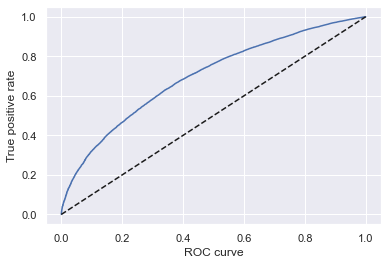

In [161]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlabel('ROC curve');

In [162]:
AUROC = roc_auc_score(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['pred_proba'])

In [163]:
AUROC

0.6977648942256378

#### Gini coefficient & Kolmogorov-Smirnov coefficient

**Gini coefficient**: Measure of the inequality between the rich and poor individuals in an economy, In our case, it'll be used to measure the inequality between the good borrowers and bad borrowers in a population.
Measured by plotting the cummulative proportion of defaulted borrowers(y) as a fuction of the cummulative proportion of defaulted borrowers(x).<br> 
The borrowers must be in ascending order, by estimated probability of being good from the PD model. The Gini coefficient is the percentage of area above the secondary diagonal line, enclosed between the concave curve and the secondary diagonal line. The greater the curve, the better the model.

**Kolmogorov-Smirnov coefficient**: Shows to what extent the model separates the actual good borrowers from the actual bad borrowers. It is the maximum difference between the cummulative distributions of good and bad borrowers. The greater this difference, the better the model

In [112]:
#sort df as a prerequisite for measuring the gini coefficient.
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('pred_proba')
df_actual_predicted_probs

,y_test,pred_proba,pred
7692,1,0.385107,0
10226,0,0.392859,0
54461,1,0.403635,0
85690,1,0.416337,0
51769,1,0.420362,0
...,...,...,...
83310,1,0.991583,1
1373,1,0.991644,1
90793,1,0.991914,1
1104,1,0.992090,1


In [113]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [114]:
df_actual_predicted_probs

,index,y_test,pred_proba,pred
0,7692,1,0.385107,0
1,10226,0,0.392859,0
2,54461,1,0.403635,0
3,85690,1,0.416337,0
4,51769,1,0.420362,0
...,...,...,...,...
93252,83310,1,0.991583,1
93253,1373,1,0.991644,1
93254,90793,1,0.991914,1
93255,1104,1,0.992090,1


In [115]:
df_actual_predicted_probs['Cummulative_N_Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cummulative_N_Good'] = df_actual_predicted_probs['y_test'].cumsum()
df_actual_predicted_probs['Cummulative_N_Bad'] = df_actual_predicted_probs['Cummulative_N_Population'] - df_actual_predicted_probs['y_test'].cumsum()

In [116]:
df_actual_predicted_probs

,index,y_test,pred_proba,pred,Cummulative_N_Population,Cummulative_N_Good,Cummulative_N_Bad
0,7692,1,0.385107,0,1,1,0
1,10226,0,0.392859,0,2,1,1
2,54461,1,0.403635,0,3,2,1
3,85690,1,0.416337,0,4,3,1
4,51769,1,0.420362,0,5,4,1
...,...,...,...,...,...,...,...
93252,83310,1,0.991583,1,93253,83059,10194
93253,1373,1,0.991644,1,93254,83060,10194
93254,90793,1,0.991914,1,93255,83061,10194
93255,1104,1,0.992090,1,93256,83062,10194


In [117]:
df_actual_predicted_probs['Cummulative_Perc_Population'] = df_actual_predicted_probs['Cummulative_N_Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cummulative_Perc_Good'] = df_actual_predicted_probs['Cummulative_N_Good'] / df_actual_predicted_probs['y_test'].sum()
df_actual_predicted_probs['Cummulative_Perc_Bad'] = df_actual_predicted_probs['Cummulative_N_Bad'] / (df_actual_predicted_probs.shape[0]- df_actual_predicted_probs['y_test'].sum())

In [118]:
df_actual_predicted_probs

,index,y_test,pred_proba,pred,Cummulative_N_Population,Cummulative_N_Good,Cummulative_N_Bad,Cummulative_Perc_Population,Cummulative_Perc_Good,Cummulative_Perc_Bad
0,7692,1,0.385107,0,1,1,0,0.000011,0.000012,0.000000
1,10226,0,0.392859,0,2,1,1,0.000021,0.000012,0.000098
2,54461,1,0.403635,0,3,2,1,0.000032,0.000024,0.000098
3,85690,1,0.416337,0,4,3,1,0.000043,0.000036,0.000098
4,51769,1,0.420362,0,5,4,1,0.000054,0.000048,0.000098
...,...,...,...,...,...,...,...,...,...,...
93252,83310,1,0.991583,1,93253,83059,10194,0.999957,0.999952,1.000000
93253,1373,1,0.991644,1,93254,83060,10194,0.999968,0.999964,1.000000
93254,90793,1,0.991914,1,93255,83061,10194,0.999979,0.999976,1.000000
93255,1104,1,0.992090,1,93256,83062,10194,0.999989,0.999988,1.000000


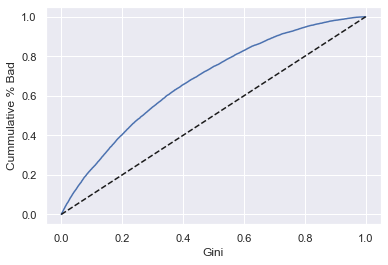

In [119]:
plt.plot(df_actual_predicted_probs['Cummulative_Perc_Population'], df_actual_predicted_probs['Cummulative_Perc_Bad'])
plt.plot(df_actual_predicted_probs['Cummulative_Perc_Population'], df_actual_predicted_probs['Cummulative_Perc_Population'], linestyle='--', color='k')
plt.xlabel('Cummulative % Population')
plt.ylabel('Cummulative % Bad')
plt.xlabel('Gini');

In [120]:
Gini = AUROC * 2 - 1
Gini

0.3955236756253888

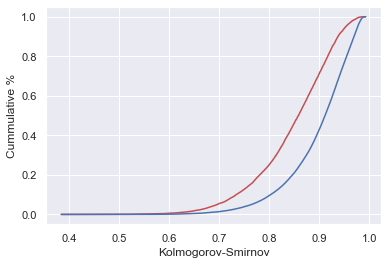

In [121]:
plt.plot(df_actual_predicted_probs['pred_proba'], df_actual_predicted_probs['Cummulative_Perc_Bad'], color='r')
plt.plot(df_actual_predicted_probs['pred_proba'], df_actual_predicted_probs['Cummulative_Perc_Good'], color='b')
plt.xlabel('Estimated Probability for being good')
plt.ylabel('Cummulative %')
plt.xlabel('Kolmogorov-Smirnov');

In [122]:
KS = max(df_actual_predicted_probs['Cummulative_Perc_Bad'] - df_actual_predicted_probs['Cummulative_Perc_Good'])
KS

0.28854190516106054

### Creating a ScoreCard

In [164]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.162230,NaN
1,grade:A,1.288272,1.384644e-104
2,grade:B,1.028765,1.726784e-86
3,grade:C,0.812880,6.746667e-58
4,grade:D,0.612982,2.842460e-35
5,grade:E,0.399848,6.323113e-18
6,grade:F,0.221881,5.887990e-06
7,home_ownership:OWN,0.078932,1.930602e-09
8,home_ownership:MORTGAGE,0.120003,1.031313e-48
9,addr_state:NY,-0.016835,2.516037e-01


In [165]:
reference_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:sm_b_educ',
 'initial_list_status:f',
 'emp_length_int:0',
 'mnths_since_issue_date:<38',
 'int_rate:<9.548',
 'annual_inc:<20k',
 'mths_since_last_delinq:<15',
 'mths_since_earliest_cr_line:<140',
 'delinq_2yrs:>=4',
 'inq_last_6mths:>6',
 'open_acc:<3',
 'pub_rec:>4',
 'acc_now_delinq:>=1',
 'total_rev_hi_lim:<5',
 'dti:>35',
 'mths_since_last_record:0-2']

In [166]:
df_ref_categories = pd.DataFrame(reference_categories, columns=['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

In [167]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.162230,NaN
1,1,grade:A,1.288272,1.384644e-104
2,2,grade:B,1.028765,1.726784e-86
3,3,grade:C,0.812880,6.746667e-58
4,4,grade:D,0.612982,2.842460e-35
5,5,grade:E,0.399848,6.323113e-18
6,6,grade:F,0.221881,5.887990e-06
7,7,home_ownership:OWN,0.078932,1.930602e-09
8,8,home_ownership:MORTGAGE,0.120003,1.031313e-48
9,9,addr_state:NY,-0.016835,2.516037e-01


In [168]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [170]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.162230,NaN,Intercept
1,1,grade:A,1.288272,1.384644e-104,grade
2,2,grade:B,1.028765,1.726784e-86,grade
3,3,grade:C,0.812880,6.746667e-58,grade
4,4,grade:D,0.612982,2.842460e-35,grade
5,5,grade:E,0.399848,6.323113e-18,grade
6,6,grade:F,0.221881,5.887990e-06,grade
7,7,home_ownership:OWN,0.078932,1.930602e-09,home_ownership
8,8,home_ownership:MORTGAGE,0.120003,1.031313e-48,home_ownership
9,9,addr_state:NY,-0.016835,2.516037e-01,addr_state


In [169]:
min_score = 300
max_score = 850

In [171]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.162230
acc_now_delinq                 0.000000
addr_state                    -0.044359
annual_inc                    -0.077988
delinq_2yrs                    0.000000
dti                            0.000000
emp_length_int                 0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                      -0.890158
mnths_since_issue_date        -1.215873
mths_since_earliest_cr_line    0.000000
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
open_acc                       0.000000
pub_rec                        0.000000
purpose                       -0.049437
total_rev_hi_lim               0.000000
verification_status           -0.002046
Name: Coefficients, dtype: float64

In [172]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.162230
acc_now_delinq                 0.000000
addr_state                     0.410537
annual_inc                     0.491744
delinq_2yrs                    0.000000
dti                            0.364259
emp_length_int                 0.145105
grade                          1.288272
home_ownership                 0.120003
initial_list_status            0.052644
inq_last_6mths                 0.995668
int_rate                       0.000000
mnths_since_issue_date         0.000000
mths_since_earliest_cr_line    0.172510
mths_since_last_delinq         0.074650
mths_since_last_record         0.000000
open_acc                       0.000000
pub_rec                        0.000000
purpose                        0.031383
total_rev_hi_lim               0.000000
verification_status            0.107902
Name: Coefficients, dtype: float64

In [173]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-3.4420903459057444

In [174]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

3.0924471257815123

In [175]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score)/ (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.162230,NaN,Intercept,-97.822720
1,1,grade:A,1.288272,1.384644e-104,grade,108.431463
2,2,grade:B,1.028765,1.726784e-86,grade,86.589250
3,3,grade:C,0.812880,6.746667e-58,grade,68.418594
4,4,grade:D,0.612982,2.842460e-35,grade,51.593597
5,5,grade:E,0.399848,6.323113e-18,grade,33.654485
6,6,grade:F,0.221881,5.887990e-06,grade,18.675349
7,7,home_ownership:OWN,0.078932,1.930602e-09,home_ownership,6.643599
8,8,home_ownership:MORTGAGE,0.120003,1.031313e-48,home_ownership,10.100446
9,9,addr_state:NY,-0.016835,2.516037e-01,addr_state,-1.416972


In [176]:
#CALCULATING SCORE FOR THE INTERCEPT
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.162230,NaN,Intercept,491.891693
1,1,grade:A,1.288272,1.384644e-104,grade,108.431463
2,2,grade:B,1.028765,1.726784e-86,grade,86.589250
3,3,grade:C,0.812880,6.746667e-58,grade,68.418594
4,4,grade:D,0.612982,2.842460e-35,grade,51.593597
5,5,grade:E,0.399848,6.323113e-18,grade,33.654485
6,6,grade:F,0.221881,5.887990e-06,grade,18.675349
7,7,home_ownership:OWN,0.078932,1.930602e-09,home_ownership,6.643599
8,8,home_ownership:MORTGAGE,0.120003,1.031313e-48,home_ownership,10.100446
9,9,addr_state:NY,-0.016835,2.516037e-01,addr_state,-1.416972


In [177]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.162230,NaN,Intercept,491.891693,492.0
1,1,grade:A,1.288272,1.384644e-104,grade,108.431463,108.0
2,2,grade:B,1.028765,1.726784e-86,grade,86.589250,87.0
3,3,grade:C,0.812880,6.746667e-58,grade,68.418594,68.0
4,4,grade:D,0.612982,2.842460e-35,grade,51.593597,52.0
5,5,grade:E,0.399848,6.323113e-18,grade,33.654485,34.0
6,6,grade:F,0.221881,5.887990e-06,grade,18.675349,19.0
7,7,home_ownership:OWN,0.078932,1.930602e-09,home_ownership,6.643599,7.0
8,8,home_ownership:MORTGAGE,0.120003,1.031313e-48,home_ownership,10.100446,10.0
9,9,addr_state:NY,-0.016835,2.516037e-01,addr_state,-1.416972,-1.0


In [178]:
min_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_score_prel

300.0

In [179]:
max_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_score_prel

850.0

### Calculating Credit Score

In [180]:
X_train_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:MORTGAGE,home_ownership:RENT_OTHER_NONE,addr_state:NY,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:CA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Source Verified,verification_status:Not Verified,verification_status:Verified,purpose:ren_en_mov_house_other,purpose:debt_consolidation,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,purpose:sm_b_educ,initial_list_status:w,initial_list_status:f,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,emp_length_int:0,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,mnths_since_issue_date:<38,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,int_rate:<9.548,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,annual_inc:<20k,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_last_delinq:<15,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,mths_since_earliest_cr_line:>=434,mths_since_earliest_cr_line:<140,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:2-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2-3,inq_last_6mths:4-6,inq_last_6mths:>6,open_acc:3-11,open_acc:11-20,open_acc:20-25,open_acc:25-28,open_acc:>=28,open_acc:<3,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:>4,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:5-16,total_rev_hi_lim:16-25,total_rev_hi_lim:25-36,total_rev_hi_lim:36-55,total_rev_hi_lim:55-73,total_rev_hi_lim:73-90,total_rev_hi_lim:>=90,total_rev_hi_lim:<5,dti:<5.5,dti:5.5-8.7,dti:8.7-14.3,dti:14.3-17.5,dti:17.5-24.7,dti:24.7-35,dti:>35,mths_since_last_record:2-41,mths_since_last_record:41-61,mths_since_last_record:61-85,mths_since_last_record:85-118,mths_since_last_record:>=118,mths_since_last_record:0-2
456615,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
451541,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
394474,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
110294,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
139343,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [181]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.162230,NaN,Intercept,491.891693,492.0
1,1,grade:A,1.288272,1.384644e-104,grade,108.431463,108.0
2,2,grade:B,1.028765,1.726784e-86,grade,86.589250,87.0
3,3,grade:C,0.812880,6.746667e-58,grade,68.418594,68.0
4,4,grade:D,0.612982,2.842460e-35,grade,51.593597,52.0
5,5,grade:E,0.399848,6.323113e-18,grade,33.654485,34.0
6,6,grade:F,0.221881,5.887990e-06,grade,18.675349,19.0
7,7,home_ownership:OWN,0.078932,1.930602e-09,home_ownership,6.643599,7.0
8,8,home_ownership:MORTGAGE,0.120003,1.031313e-48,home_ownership,10.100446,10.0
9,9,addr_state:NY,-0.016835,2.516037e-01,addr_state,-1.416972,-1.0


In [182]:
X_test_with_ref_cat_w_intercept = X_test_with_ref_cat

In [183]:
X_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [184]:
X_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:MORTGAGE,home_ownership:RENT_OTHER_NONE,addr_state:NY,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:CA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Source Verified,verification_status:Not Verified,verification_status:Verified,purpose:ren_en_mov_house_other,purpose:debt_consolidation,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,purpose:sm_b_educ,initial_list_status:w,initial_list_status:f,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,emp_length_int:0,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,mnths_since_issue_date:<38,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,int_rate:<9.548,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,annual_inc:<20k,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_last_delinq:<15,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,mths_since_earliest_cr_line:>=434,mths_since_earliest_cr_line:<140,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:2-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2-3,inq_last_6mths:4-6,inq_last_6mths:>6,open_acc:3-11,open_acc:11-20,open_acc:20-25,open_acc:25-28,open_acc:>=28,open_acc:<3,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:>4,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:5-16,total_rev_hi_lim:16-25,total_rev_hi_lim:25-36,total_rev_hi_lim:36-55,total_rev_hi_lim:55-73,total_rev_hi_lim:73-90,total_rev_hi_lim:>=90,total_rev_hi_lim:<5,dti:<5.5,dti:5.5-8.7,dti:8.7-14.3,dti:14.3-17.5,dti:17.5-24.7,dti:24.7-35,dti:>35,mths_since_last_record:2-41,mths_since_last_record:41-61,mths_since_last_record:61-85,mths_since_last_record:85-118,mths_since_last_record:>=118,mths_since_last_record:0-2
395346,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
376583,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
297790,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
47347,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
446772,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [185]:
X_test_with_ref_cat_w_intercept = X_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [186]:
X_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NY,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:CA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,verification_status:Source Verified,verification_status:Not Verified,purpose:ren_en_mov_house_other,purpose:debt_consolidation,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,initial_list_status:w,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,mths_since_earliest_cr_line:>=434,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2-3,inq_last_6mths:4-6,dti:<5.5,dti:5.5-8.7,dti:8.7-14.3,dti:14.3-17.5,dti:17.5-24.7,dti:24.7-35,grade:G,home_ownership:RENT_OTHER_NONE,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:sm_b_educ,initial_list_status:f,emp_length_int:0,mnths_since_issue_date:<38,int_rate:<9.548,annual_inc:<20k,mths_since_last_delinq:<15,mths_since_earliest_cr_line:<140,delinq_2yrs:>=4,inq_last_6mths:>6,open_acc:<3,pub_rec:>4,acc_now_delinq:>=1,total_rev_hi_lim:<5,dti:>35,mths_since_last_record:0-2
395346,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
376583,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
297790,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1
47347,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
446772,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [188]:
scorecard_scores = df_scorecard['Score - Preliminary']

In [189]:
X_test_with_ref_cat_w_intercept.shape, scorecard_scores.shape

((93257, 92), (92,))

In [190]:
scorecard_scores = scorecard_scores.values.reshape(92, 1)

In [191]:
scorecard_scores.shape

(92, 1)

In [192]:
scorecard_scores

array([[ 492.],
       [ 108.],
       [  87.],
       [  68.],
       [  52.],
       [  34.],
       [  19.],
       [   7.],
       [  10.],
       [  -1.],
       [  35.],
       [  -4.],
       [  -2.],
       [   1.],
       [   1.],
       [   6.],
       [   7.],
       [  16.],
       [  16.],
       [  22.],
       [  -0.],
       [   9.],
       [  -2.],
       [  -4.],
       [   1.],
       [   3.],
       [   4.],
       [  11.],
       [  12.],
       [   9.],
       [   6.],
       [  12.],
       [ -16.],
       [ -26.],
       [ -45.],
       [ -58.],
       [ -79.],
       [-102.],
       [ -98.],
       [ -27.],
       [ -49.],
       [ -66.],
       [ -75.],
       [  -7.],
       [  -1.],
       [   8.],
       [  12.],
       [  19.],
       [  25.],
       [  30.],
       [  32.],
       [  37.],
       [  41.],
       [  41.],
       [   6.],
       [   6.],
       [   3.],
       [   4.],
       [   5.],
       [  13.],
       [  15.],
       [  10.],
       [

In [193]:
#summing the multiplication of the two arrays
y_scores = X_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [194]:
y_scores

,0
395346,570.0
376583,718.0
297790,598.0
47347,616.0
446772,580.0
...,...
32147,670.0
78936,531.0
459582,525.0
454915,618.0


In [195]:
y_scores[0].values.min()

360.0

### Getting PD from Credit Score

In [196]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [197]:
pred_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
pred_proba_from_score.head()

,0
395346,0.441710
376583,0.821150
297790,0.524590
47347,0.577446
446772,0.471178


In [198]:
pred[0:5]

array([0.44361038, 0.82371915, 0.52484014, 0.57675137, 0.46994207])

### Setting a cut-offs

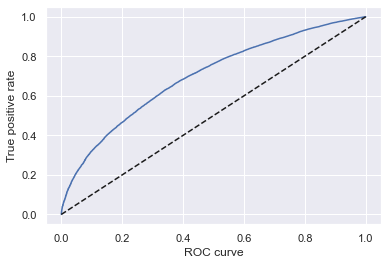

In [199]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlabel('ROC curve');

In [200]:
thresholds

array([1.94223707, 0.94223707, 0.93353713, ..., 0.0650058 , 0.06118689,
       0.06062755])

In [201]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)

In [202]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [203]:
#the roc curve method sets the first threshold where nothing is being predicted to the maximum probability score from the supplied data + 1
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.942237,0.000000,0.000000
1,0.942237,0.000000,0.000012
2,0.933537,0.000000,0.000084
3,0.933193,0.000098,0.000084
4,0.903280,0.000098,0.003684


In [204]:
df_cutoffs['thresholds'][0] = 1-1/np.power(10,16)

In [205]:
df_cutoffs['score'] = ((np.log(df_cutoffs['thresholds']/ (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score)

In [206]:
df_cutoffs.head()

,thresholds,fpr,tpr,score
0,1.000000,0.000000,0.000000,2386.858801
1,0.942237,0.000000,0.000012,824.704313
2,0.933537,0.000000,0.000084,812.115077
3,0.933193,0.000098,0.000084,811.648699
4,0.903280,0.000098,0.003684,777.763586


In [207]:
df_cutoffs['score'][0] = max_score

In [208]:
df_cutoffs

,thresholds,fpr,tpr,score
0,1.000000,0.000000,0.000000,850.000000
1,0.942237,0.000000,0.000012,824.704313
2,0.933537,0.000000,0.000084,812.115077
3,0.933193,0.000098,0.000084,811.648699
4,0.903280,0.000098,0.003684,777.763586
...,...,...,...,...
17471,0.085080,0.999804,0.999904,389.794851
17472,0.082252,0.999902,0.999904,386.689552
17473,0.065006,0.999902,0.999988,365.316719
17474,0.061187,1.000000,0.999988,359.877804


In [209]:
df_cutoffs.tail()

,thresholds,fpr,tpr,score
17471,0.085080,0.999804,0.999904,389.794851
17472,0.082252,0.999902,0.999904,386.689552
17473,0.065006,0.999902,0.999988,365.316719
17474,0.061187,1.000000,0.999988,359.877804
17475,0.060628,1.000000,1.000000,359.054710


In [210]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['pred_proba'] >= p, 1, 0).sum()

In [211]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['pred_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved']/ df_actual_predicted_probs['pred_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [212]:
df_cutoffs.head()

,thresholds,fpr,tpr,score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.000000,0,93257,0.000000,1.000000
1,0.942237,0.000000,0.000012,824.704313,1,93256,0.000011,0.999989
2,0.933537,0.000000,0.000084,812.115077,7,93250,0.000075,0.999925
3,0.933193,0.000098,0.000084,811.648699,8,93249,0.000086,0.999914
4,0.903280,0.000098,0.003684,777.763586,307,92950,0.003292,0.996708


In [213]:
df_cutoffs.tail()

,thresholds,fpr,tpr,score,N Approved,N Rejected,Approval Rate,Rejection Rate
17471,0.085080,0.999804,0.999904,389.794851,93247,10,0.999893,0.000107
17472,0.082252,0.999902,0.999904,386.689552,93248,9,0.999903,0.000097
17473,0.065006,0.999902,0.999988,365.316719,93255,2,0.999979,0.000021
17474,0.061187,1.000000,0.999988,359.877804,93256,1,0.999989,0.000011
17475,0.060628,1.000000,1.000000,359.054710,93257,0,1.000000,0.000000


In [214]:
#if the lowest posiible probability for being good is 90%
df_cutoffs.iloc[5000:6200, :]

,thresholds,fpr,tpr,score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.543395,0.252992,0.531958,604.361084,46765,46492,0.501464,0.498536
5001,0.543392,0.253090,0.531958,604.360132,46766,46491,0.501474,0.498526
5002,0.543384,0.253090,0.531982,604.357541,46768,46489,0.501496,0.498504
5003,0.543363,0.253286,0.531982,604.350404,46770,46487,0.501517,0.498483
5004,0.543301,0.253286,0.532174,604.329331,46786,46471,0.501689,0.498311
...,...,...,...,...,...,...,...,...
6195,0.509632,0.316657,0.602013,592.957806,53233,40024,0.570820,0.429180
6196,0.509623,0.316657,0.602073,592.954710,53238,40019,0.570874,0.429126
6197,0.509616,0.316755,0.602073,592.952265,53239,40018,0.570885,0.429115
6198,0.509611,0.316755,0.602121,592.950708,53243,40014,0.570928,0.429072


### Save Results

In [215]:
X_train_with_ref_cat.to_csv('loan_data/PD_train_data.csv')
df_scorecard.to_csv('loan_data/df_scorecard_PD.csv')